# Analysis of Arresting Agencies in Rogers and Love County

In [ ]:
!pip install oscn==0.0.0.19
import oscn

## Request and save cases from Rogers and Love 


### Step 1. Define the data to request

In [2]:
years = ['2017','2018']
counties = ['love','rogers']
types =['CM','CF']


### Step 2.  Request and save the cases
This takes approximately 90 minutes

In [13]:


import pickle

for year in years:
  for county in counties:
    for type in types:      
      cases=oscn.request.CaseList(type=type, year=year,county=county)
      all_cases = [c for c in cases]
      f = open(f'{county}.{year}.{type}.pckl', 'wb')
      pickle.dump(all_cases, f)
      f.close()

Applications      Music             anaconda2         orion
Desktop           Pictures          google-cloud-sdk  p3envs
Documents         Public            logfile           projects
Downloads         Sites             love.2017.CM.pckl reverse
Library           Untitled.ipynb    mltut             tmp
Movies            VirtualBox VMs    node_modules      venvs


### Step 2.  Retrieve the data from saved files

In [3]:


import pickle



saved_cases = []
case_count =0 
for year in years:
  for county in counties:
    for type in types:
        file_name = f'/Users/owner/projects/cft/oscn-notebooks/data/{county}.{year}.{type}.pckl'
        print(file_name)
        new_cases = pickle.load(open(file_name, 'rb'))
        new_case_count = len(new_cases)
        case_count += new_case_count
        print(f' added {new_case_count}')
        saved_cases += new_cases
        
print(f'counted case: {case_count} length saved {len(saved_cases)}')


/Users/owner/projects/cft/oscn-notebooks/data/love.2017.CM.pckl
 added 785
/Users/owner/projects/cft/oscn-notebooks/data/love.2017.CF.pckl
 added 305
/Users/owner/projects/cft/oscn-notebooks/data/rogers.2017.CM.pckl
 added 1114
/Users/owner/projects/cft/oscn-notebooks/data/rogers.2017.CF.pckl
 added 1060
/Users/owner/projects/cft/oscn-notebooks/data/love.2018.CM.pckl
 added 552
/Users/owner/projects/cft/oscn-notebooks/data/love.2018.CF.pckl
 added 197
/Users/owner/projects/cft/oscn-notebooks/data/rogers.2018.CM.pckl
 added 853
/Users/owner/projects/cft/oscn-notebooks/data/rogers.2018.CF.pckl
 added 534
counted case: 5400 length saved 5400


### Step 3.  Load the data for analysis
This takes about 8 minutes

In [5]:
import numpy as np

import pandas as pd


columns = ['Year','County','Type','Agency','Officer','Case Number']



def agency(case):
  agency_desc = 'ARRESTING AGENCY'
  for p in case.parties:
    if agency_desc in p['type']:
      return p['name']
  return 'UNKNOWN'

def officer(case):
  agency_desc = 'ARRESTING OFFICER'
  for p in case.parties:
    if agency_desc in p['type']:
      return p['name']
  return 'UNKNOWN'
  
case_data = lambda c: [c.year, c.county, c.type, agency(c), officer(c),  c.case_number ]
%time df = pd.DataFrame([case_data(c) for c in saved_cases], columns = columns)

CPU times: user 8min 4s, sys: 324 ms, total: 8min 5s
Wall time: 8min 5s


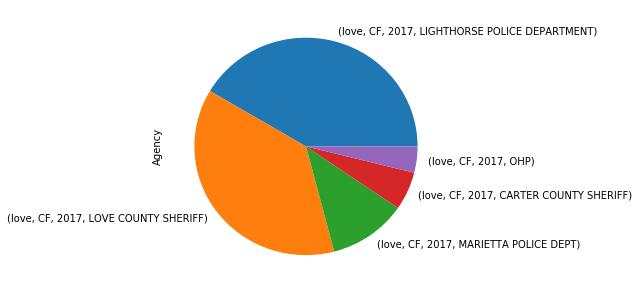

In [6]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt



df['Year'].value_counts()
# df['Type'].value_counts()
# df['Agency'].value_counts()
# df.filter(like='LIGHTHORSE',axis=0)
# qf = df.query("Type == 'CF'")

agency_group = df.groupby(['County','Type','Year'])['Agency'].value_counts().head(5)



agency_group.plot.pie(y='Agency', figsize=(5, 5))
